In [642]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [549]:
%run autoenc_br.py --epochs 1 --connected_components 4 --dataset colmnist --regularizer spectral

/home/c01ekar/anaconda3/envs/ae/lib/python3.7/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Batch 1, loss 1.226069450378418
Batch 101, loss 0.5764804072309249
Batch 201, loss 0.38295239132286896
Batch 301, loss 0.2744849140622786
Train epoch 1, loss 0.2647189577630819


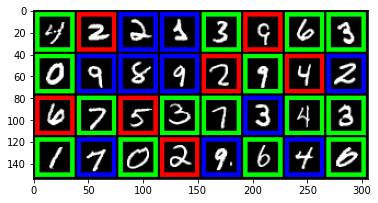

torch.Size([3, 36, 36])


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from col_mnist import ColMNIST

test_loader = torch.utils.data.DataLoader(
  ColMNIST('data/mnist', train=False, download=True,
                             transform=torchvision.transforms.Compose([#torchvision.transforms.Resize((224, 224)),
                               torchvision.transforms.ToTensor()
                             ])),
  batch_size=32, shuffle=True)

def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(test_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
img_shape = images[0].shape
print(img_shape)

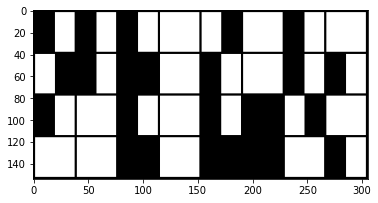

torch.Size([3, 36, 36])


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from split_dataset import SplitDS

test_loader = torch.utils.data.DataLoader(SplitDS(), batch_size=32, shuffle=True)

def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(test_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
img_shape = images[0].shape
print(img_shape)

# Visualizing the reconstruction

In [6]:
import matplotlib.pyplot as plt

def show_reconstruction(test_examples, reconstruction):
    with torch.no_grad():
        number = 10
        plt.figure(figsize=(20, 4))
        for index in range(number):
            # display original
            ax = plt.subplot(2, number, index + 1)
            plt.imshow(np.transpose(test_examples[index].cpu().numpy(), (1, 2, 0)))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

            # display reconstruction
            ax = plt.subplot(2, number, index + 1 + number)
            plt.imshow(np.clip(np.transpose(reconstruction[index].numpy(), (1, 2, 0)), 0, 1))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()


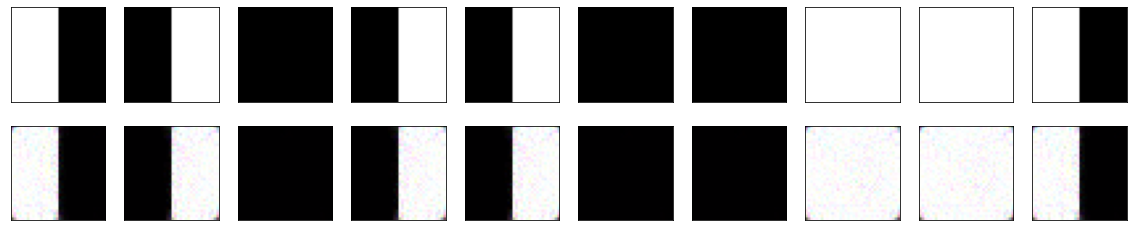

In [566]:
test_examples = None
for batch_features in trainer.test_loader:
    batch_features = batch_features[0]
    test_examples = batch_features.to(device)
with torch.no_grad():
    reconstruction = trainer.model(test_examples).cpu()
show_reconstruction(test_examples, reconstruction)

In [567]:
ae = trainer.model
w1 = ae.encoder_output_layer.weight.cpu().detach()
w2 = ae.decoder_hidden_layer.weight.cpu().detach()
w1.shape

torch.Size([4, 128])

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

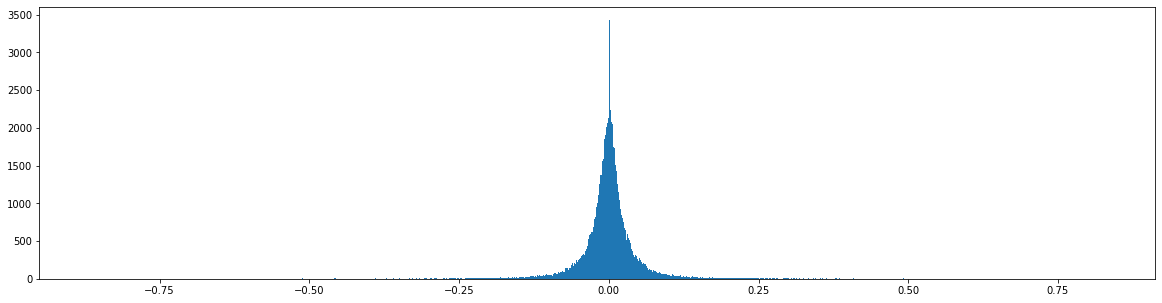

In [568]:
plt.figure(figsize=(20, 5))
#plt.plot(np.sort(trainer.evec[0].detach().numpy()), label='1')
#plt.plot(np.sort(trainer.evec[1].detach().numpy()), label='2')
#plt.plot(np.sort(trainer.evec[2].detach().numpy()), label='3')
#plt.plot(np.sort(trainer.evec[3].detach().numpy()), label='4')
#plt.plot(np.sort(trainer.evec[4].detach().numpy()), label='5')
#plt.legend()
plt.hist(trainer.evec.detach().cpu().numpy().flatten(),bins=1000)

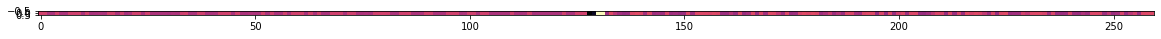

In [569]:
v2 = trainer.evec[:, 1].detach().cpu().numpy()

plt.figure(figsize=(20, 20)) 
plt.imshow(np.expand_dims(v2, axis=0), cmap='magma')

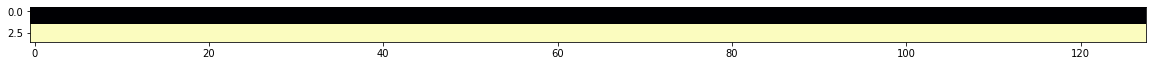

In [570]:
hidden_size = trainer.model.hidden_size
bn_size = trainer.model.bottleneck_size

mask = torch.zeros(w1.shape)
mask.shape
mask[v2[hidden_size:hidden_size+bn_size]>0] = 1
plt.figure(figsize=(20, 20)) 
plt.imshow(mask, cmap='magma')

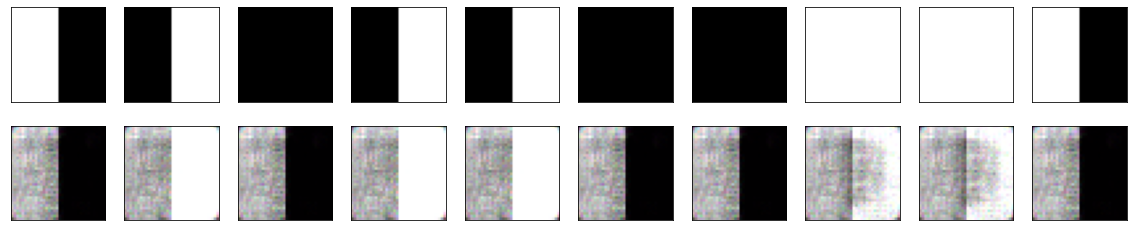

In [571]:
trainer.model.set_mask(mask)
with torch.no_grad():
    rec1 = trainer.model(test_examples).cpu()
show_reconstruction(test_examples, rec1)

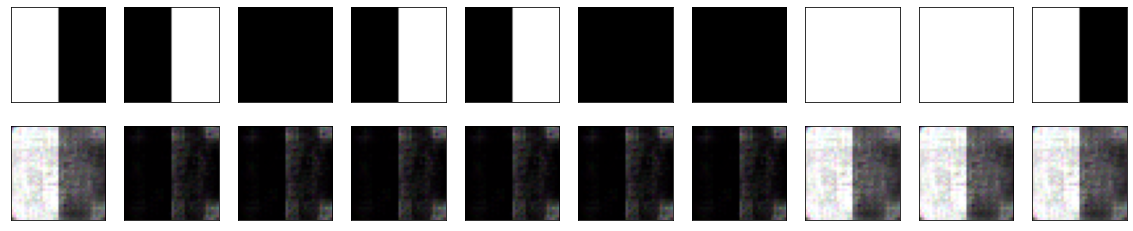

In [572]:
mask = torch.zeros(w1.shape)
mask.shape
mask[v2[hidden_size:hidden_size+bn_size]<0] = 1
trainer.model.set_mask(mask)
with torch.no_grad():
    rec2 = trainer.model(test_examples).cpu()
show_reconstruction(test_examples, rec2)

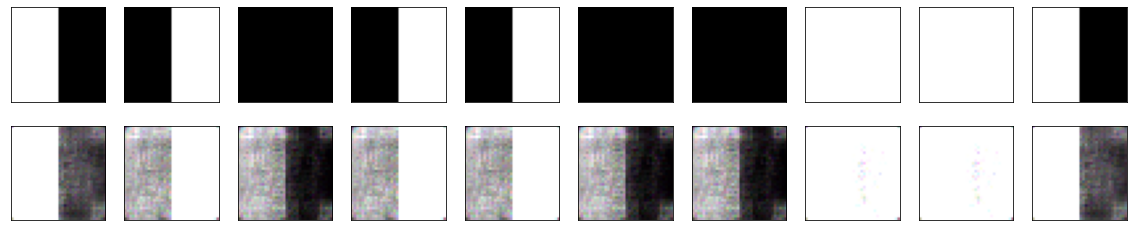

In [573]:
show_reconstruction(test_examples, rec1+rec2)

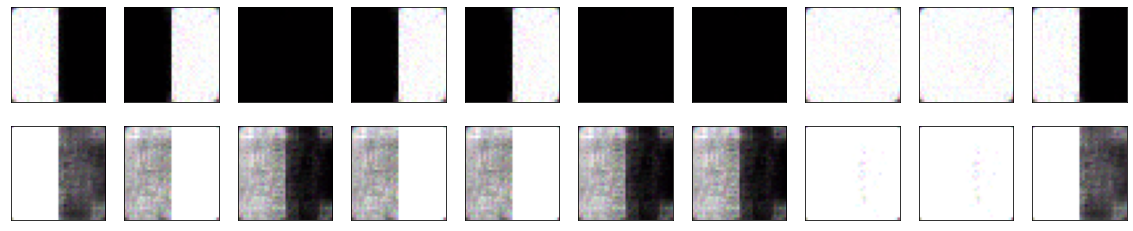

In [574]:
show_reconstruction(reconstruction, rec1+rec2)

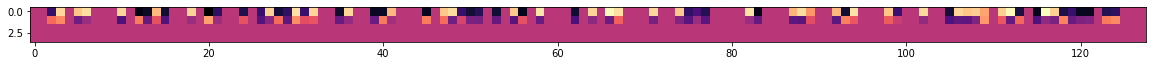

In [562]:
plt.figure(figsize=(20, 20)) 
plt.imshow((w1 * mask).cpu().numpy(), cmap='magma')

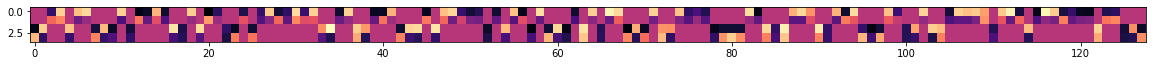

In [563]:
plt.figure(figsize=(20, 20)) 
plt.imshow((w1).cpu().numpy(), cmap='magma')

In [564]:
trainer.model.set_mask(None)
show_reconstruction(test_examples)

TypeError: show_reconstruction() missing 1 required positional argument: 'reconstruction'

# Results of the spectral clustering

In [ ]:
plt.figure(figsize=(20, 5)) 
plt.hist(trainer.evec.detach().cpu().numpy().flatten(), bins=500)

In [ ]:
srt_enc = np.argsort(v2[:hidden_size]).tolist()
srt_hidden = np.argsort(v2[hidden_size:hidden_size+bn_size]).tolist()
srt_dec = np.argsort(v2[hidden_size+bn_size:]).tolist()


trainer.model.set_mask(None)

w1 = ae.encoder_output_layer.weight.cpu().detach()
w1 = w1[:, srt_enc]
w1 = w1[srt_hidden, :]

w2 = ae.decoder_hidden_layer.weight.cpu().detach()
w2 = w2[srt_dec, :]
w2 = w2[:, srt_hidden]

In [ ]:
plt.figure(figsize=(20, 20)) 
plt.imshow((w1).cpu().numpy(), cmap='magma')
plt.colorbar()

In [ ]:
plt.figure(figsize=(20, 20)) 
plt.imshow((w2).cpu().numpy(), cmap='magma')
plt.colorbar()

# More components

In [1]:
%run autoenc_br.py --epochs 1 --connected_components 4 --dataset colmnist --regularizer spectral

/home/c01ekar/anaconda3/envs/ae/lib/python3.7/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Batch 1, loss 11.844645500183105
Batch 101, loss 3.3712573712415033
Batch 201, loss 1.7367182302830824
Batch 301, loss 1.182419212999138
Batch 401, loss 0.9031620726379522
Batch 501, loss 0.7347938576025401
Batch 601, loss 0.6219731951922723
Batch 701, loss 0.5411368340423885
Batch 801, loss 0.48038648726062827
Batch 901, loss 0.4330488571299697
Batch 1001, loss 0.3950639934307867
Batch 1101, loss 0.36399534779459536
Batch 1201, loss 0.3380442657519588
Batch 1301, loss 0.31607569699432647
Batch 1401, loss 0.29715329561805315
Batch 1501, loss 0.28073800962013773
Batch 1601, loss 0.26635186729497795
Batch 1701, loss 0.25363845271504604
Batch 1801, loss 0.24232728764216216
Train epoch 1, loss 0.23473463610410691


In [2]:
ncc = 6

/home/c01ekar/anaconda3/envs/ae/lib/python3.7/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


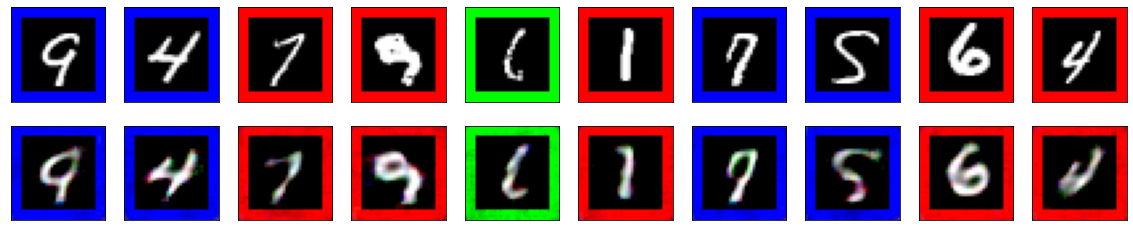

In [7]:
test_examples = None
for batch_features in trainer.test_loader:
    batch_features = batch_features[0]
    test_examples = batch_features.to(device)
with torch.no_grad():
    reconstruction = trainer.model(test_examples).cpu()
show_reconstruction(test_examples, reconstruction)

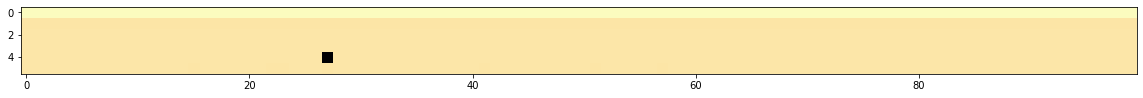

In [8]:
hidden_size = trainer.model.hidden_size
bn_size = trainer.model.bottleneck_size

v = trainer.evec[hidden_size:hidden_size+bn_size, :ncc].detach().cpu().numpy().transpose(1, 0)
plt.figure(figsize=(20, 20)) 
plt.imshow(v, cmap="magma")

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 3 4 3 3 3 4 4 2 4 4 4 4 4 4 4 4 4
 4 4 4 4 3 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


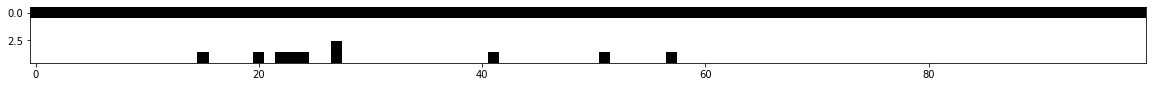

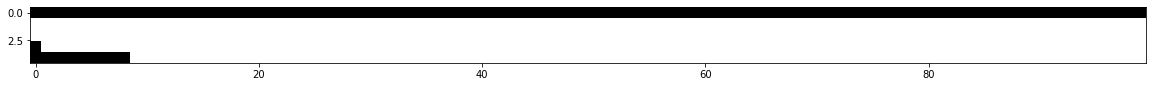

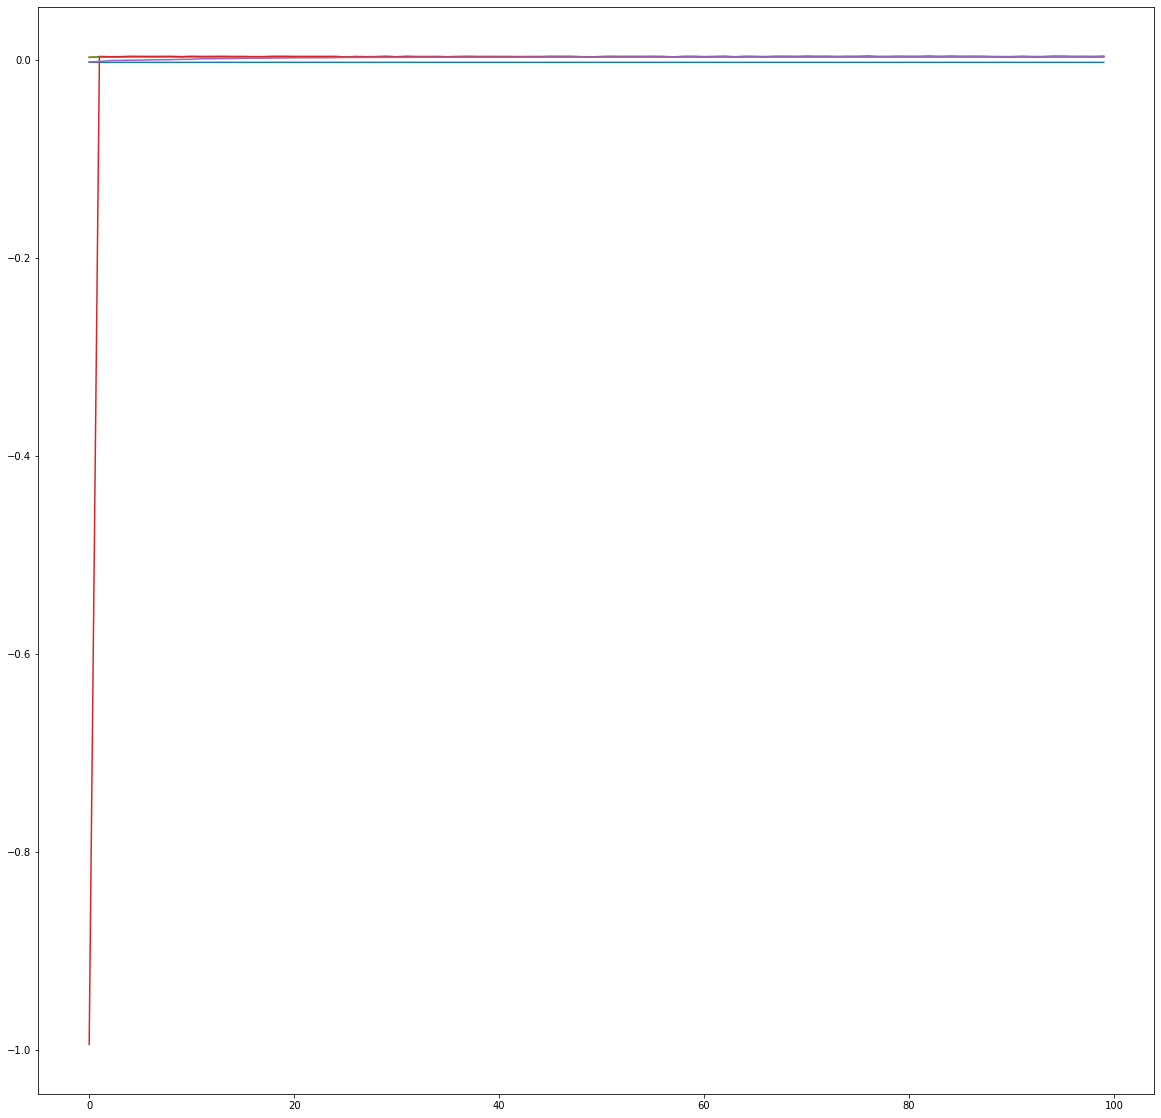

In [9]:
plt.figure(figsize=(20, 20)) 
plt.imshow(v[1:]>0)
plt.figure(figsize=(20, 20)) 
plt.imshow(v[1:, np.argsort(v[ncc-1])]>0)
plt.figure(figsize=(20, 20)) 
plt.plot(v[1:, np.argsort(v[ncc-1])].transpose(1, 0))
print((v[1:]>0).sum(axis=0))

In [10]:
blocks = np.zeros(bn_size, dtype=int)
c = 0
for i in range(1, bn_size):
    idx = np.argsort(v[ncc-1])[i]
    idx_prev = np.argsort(v[ncc-1])[i-1]
    if ((v[:, idx] > 0) != (v[:, idx_prev]>0)).any():
        c+=1
    blocks[idx] = c
blocks[np.argsort(v[ncc-1])]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
ae = trainer.model

w1 = ae.encoder_output_layer.weight.cpu().detach()
w2 = ae.decoder_hidden_layer.weight.cpu().detach()

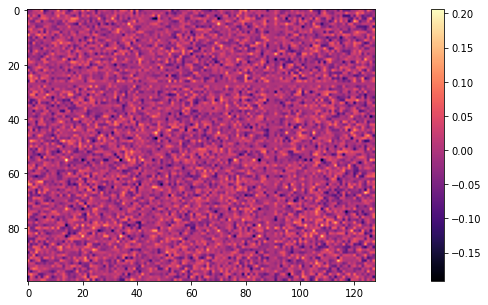

In [12]:
plt.figure(figsize=(20, 5)) 
plt.imshow((w1).cpu().numpy(), cmap='magma')
plt.colorbar()

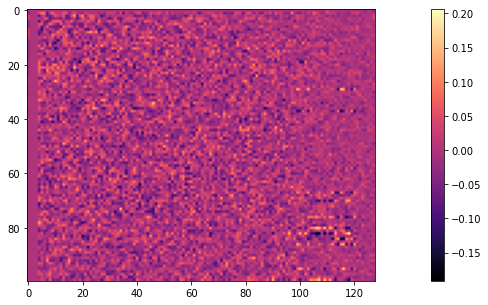

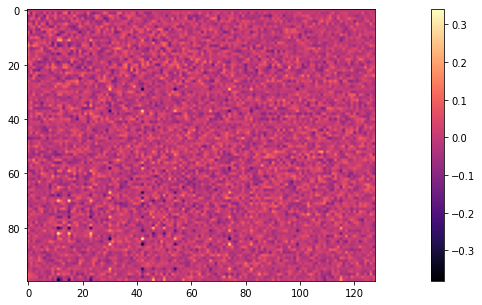

In [13]:
v2 = trainer.evec[:, ncc-1].detach().cpu().numpy()
srt_enc = np.argsort(v2[:hidden_size]).tolist()
srt_hidden = np.argsort(v2[hidden_size:hidden_size+bn_size]).tolist()
srt_dec = np.argsort(v2[hidden_size+bn_size:]).tolist()


trainer.model.set_mask(None)

w1 = ae.encoder_output_layer.weight.cpu().detach()
w1 = w1[:, srt_enc]
w1 = w1[srt_hidden, :]
plt.figure(figsize=(20, 5)) 
plt.imshow((w1).cpu().numpy(), cmap='magma')
plt.colorbar()

w2 = ae.decoder_hidden_layer.weight.cpu().detach()
w2 = w2[srt_dec, :]
w2 = w2[:, srt_hidden]
plt.figure(figsize=(20, 5)) 
plt.imshow((w2).cpu().numpy().transpose(1, 0), cmap='magma')
plt.colorbar()

/home/c01ekar/anaconda3/envs/ae/lib/python3.7/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


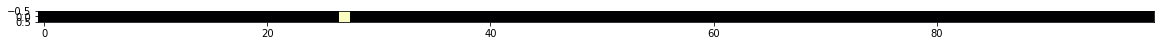

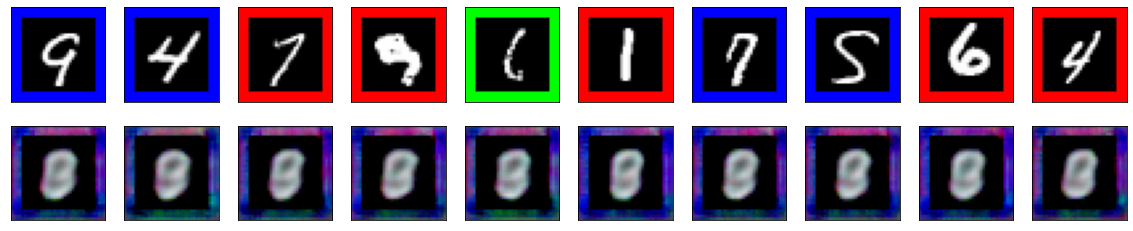

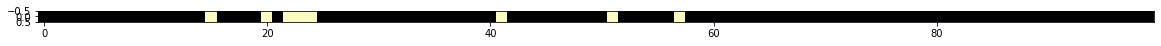

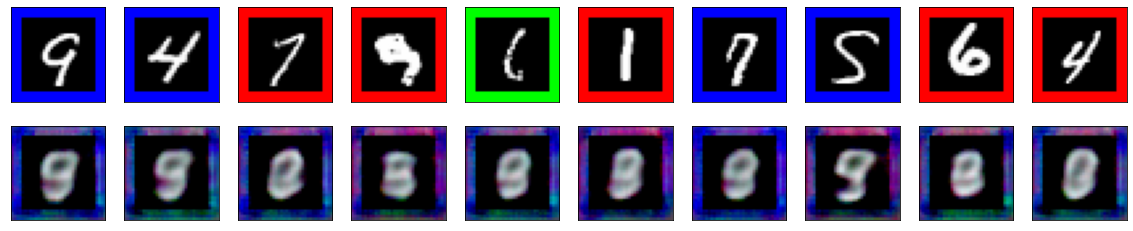

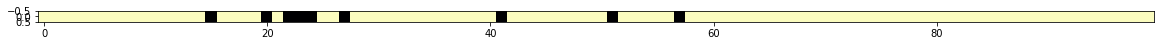

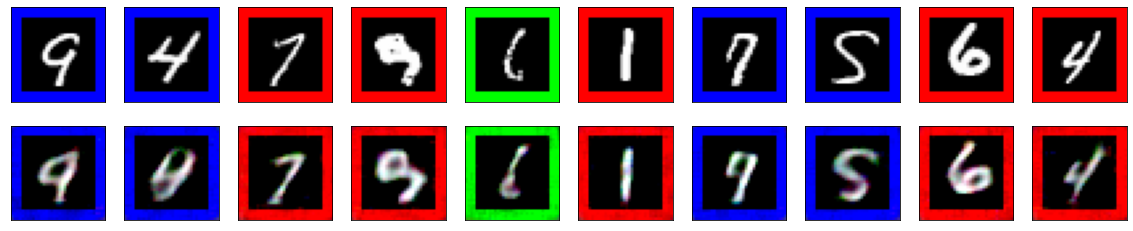

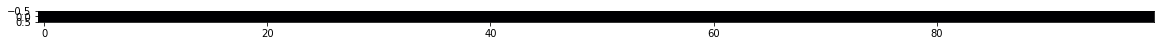

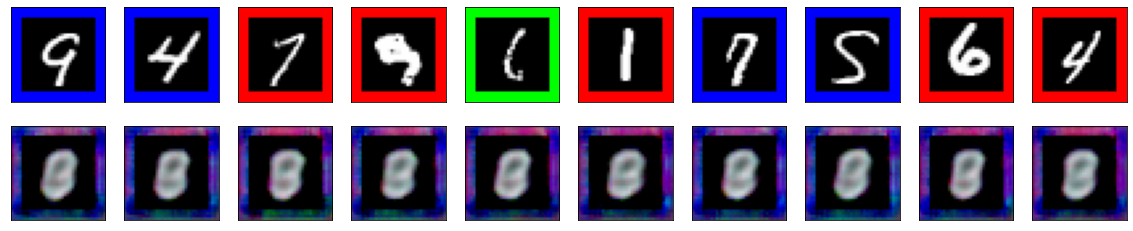

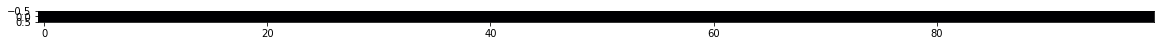

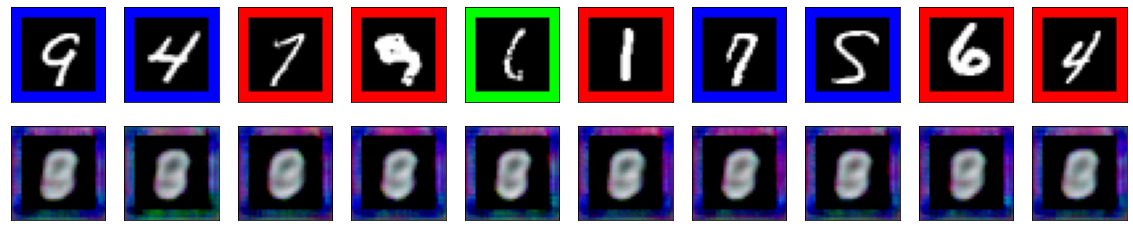

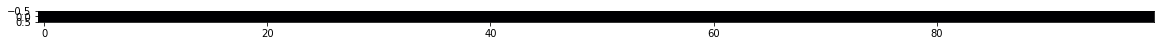

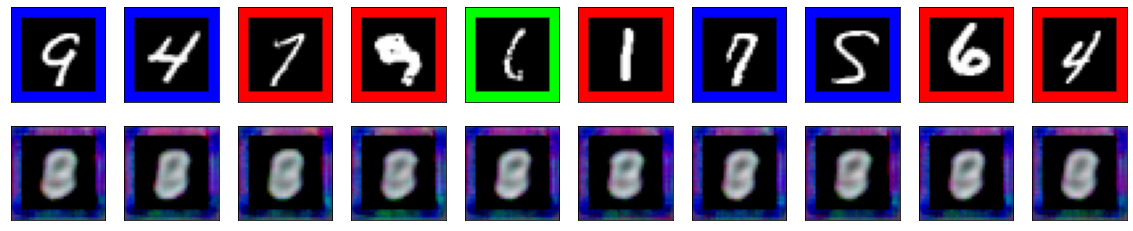

In [14]:
for c in range(ncc):
    mask = torch.zeros(w1.shape)
    mask.shape
    mask[blocks==c] = 1
    plt.figure(figsize=(20, 20)) 
    plt.imshow(mask[:, :1].transpose(1, 0), cmap='magma')
    trainer.model.set_mask(mask)
    
    with torch.no_grad():
        reconstruction = trainer.model(test_examples).cpu()
    show_reconstruction(test_examples, reconstruction)

# Block regularization minimal example

In [ ]:
%run autoenc_br.py --epochs 1 --bn_size 100 --connected_components 6 --dataset dsprites

In [ ]:
test_examples = None
for batch_features in trainer.test_loader:
    batch_features = batch_features[0]
    test_examples = batch_features.to(device)
with torch.no_grad():
    reconstruction = trainer.model(test_examples).cpu()
show_reconstruction(test_examples, reconstruction)

In [ ]:
%run autoenc_br.py --epochs 1 --bn_size 100 --connected_components 1 --dataset dsprites

In [ ]:
test_examples = None
for batch_features in trainer.test_loader:
    batch_features = batch_features[0]
    test_examples = batch_features.to(device)
with torch.no_grad():
    reconstruction = trainer.model(test_examples).cpu()
show_reconstruction(test_examples, reconstruction)